In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
df = pd.read_csv('datosenigh2016reducido.txt', sep = '\t')

In [3]:
df.describe()

,folioviv,ingresotrim,edad,hor_1,hijos_viv,antiguedad,focos_inca,focos_ahor,renta,estim_pago,tot_resid,tot_hom,tot_muj,tot_hog,factor
count,6.684500e+04,6.684500e+04,66845.000000,66845.000000,66845.000000,66845.000000,66845.000000,66845.000000,66845.000000,66845.000000,66845.000000,66845.000000,66845.000000,66845.000000,66845.000000
mean,1.594561e+09,2.322465e+04,49.127205,31.595108,0.965607,17.177261,1.357977,5.164814,226.182676,1505.498347,3.707054,1.812327,1.894727,1.016456,474.106784
std,9.336194e+08,1.567333e+05,15.949107,26.557928,2.242695,16.270626,2.373277,4.901125,904.418015,2100.356358,1.893243,1.181223,1.228393,0.144923,498.479730
min,1.000038e+08,2.930000e+00,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,7.000000
25%,7.620035e+08,7.434780e+03,37.000000,0.000000,0.000000,5.000000,0.000000,2.000000,0.000000,500.000000,2.000000,1.000000,1.000000,1.000000,177.000000
50%,1.562090e+09,1.466850e+04,47.000000,37.000000,0.000000,14.000000,0.000000,4.000000,0.000000,1000.000000,4.000000,2.000000,2.000000,1.000000,340.000000
75%,2.402881e+09,2.513151e+04,60.000000,50.000000,0.000000,25.000000,2.000000,7.000000,0.000000,2000.000000,5.000000,2.000000,3.000000,1.000000,583.000000
max,3.260802e+09,3.514510e+07,105.000000,168.000000,21.000000,99.000000,98.000000,99.000000,33000.000000,204000.000000,22.000000,12.000000,14.000000,5.000000,5386.000000


In [38]:
# clean data
data = df.copy()
data['renta_approx'] = np.where(data['renta'] > 0, data['renta'], data['estim_pago'])
data['renta'] = np.where(data['renta'] > 0, 1, 0)
data['tot_focos'] = data['focos_inca'] + data['focos_ahor']

# dummy variable para los focos
# 1 si tiene focos ahorradores 0 e.o.c.
data['ahorradores'] = np.where(data['focos_ahor'] > 0, 1, 0)

y = []
for ingreso in data['ingresotrim']:
    if ingreso < 1.466850e+04:
        y.append(0)
    elif ingreso < 2.513151e+04:
        y.append(1)
    else:
        y.append(2)

data.drop(columns = ['folioviv', 'estim_pago', 'focos_inca', 'focos_ahor','factor','ingresotrim'], inplace = True)


In [39]:
data.describe()

,edad,hor_1,hijos_viv,antiguedad,renta,tot_resid,tot_hom,tot_muj,tot_hog,renta_approx,tot_focos,ahorradores
count,66845.000000,66845.000000,66845.000000,66845.000000,66845.000000,66845.000000,66845.000000,66845.000000,66845.000000,66845.000000,66845.000000,66845.000000
mean,49.127205,31.595108,0.965607,17.177261,0.122627,3.707054,1.812327,1.894727,1.016456,1731.681023,6.522792,0.861785
std,15.949107,26.557928,2.242695,16.270626,0.328011,1.893243,1.181223,1.228393,0.144923,2132.703284,4.747881,0.345128
min,14.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,37.000000,0.000000,0.000000,5.000000,0.000000,2.000000,1.000000,1.000000,1.000000,800.000000,4.000000,1.000000
50%,47.000000,37.000000,0.000000,14.000000,0.000000,4.000000,2.000000,2.000000,1.000000,1200.000000,6.000000,1.000000
75%,60.000000,50.000000,0.000000,25.000000,0.000000,5.000000,2.000000,3.000000,1.000000,2000.000000,8.000000,1.000000
max,105.000000,168.000000,21.000000,99.000000,1.000000,22.000000,12.000000,14.000000,5.000000,204000.000000,187.000000,1.000000


In [40]:
data.head()

,edad,hor_1,hijos_viv,antiguedad,renta,tot_resid,tot_hom,tot_muj,tot_hog,renta_approx,tot_focos,ahorradores
0,33,40,0,0,1,2,1,1,1,2700,11,1
1,29,75,0,0,1,2,1,1,1,3000,7,1
2,47,0,0,20,0,6,2,4,1,4000,17,1
3,29,40,0,0,1,3,0,3,1,4000,13,1
4,55,37,0,7,0,2,2,0,1,5000,12,1


In [110]:
#Estandarizar datos
for col in ['edad', 'hor_1', 'hijos_viv', 'antiguedad', 'tot_resid',
       'tot_hom', 'tot_muj', 'tot_hog', 'renta_approx', 'tot_focos']:
    mu = np.mean(data[col])
    sigma = np.std(data[col])
    data[col] = data[col].apply(lambda x: (x-mu)/sigma)

In [41]:
# Obtenemos el conjunto de train y test (80/20)
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.2, random_state = 158999)

### LDA

In [42]:
lda = LDA(n_components = None)

In [43]:
X_lda = lda.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [45]:
X_train = lda.transform(X_train)  
X_test = lda.transform(X_test) 

In [44]:
lda.explained_variance_ratio_

array([0.89652791, 0.10347209])

In [13]:
X_train = lda.fit_transform(X_train, y_train)  
X_test = lda.transform(X_test) 

array([[ 0.90434246],
       [-0.47260179],
       [-0.86375894],
       ...,
       [ 0.98859516],
       [-0.20824118],
       [-0.20165922]])

In [112]:
n = len(data.columns) -1

In [113]:
means_df = data.groupby('ingreso').mean()

In [114]:
means_df

,edad,hor_1,hijos_viv,antiguedad,renta,tot_resid,tot_hom,tot_muj,tot_hog,renta_approx,tot_focos,ahorradores
ingreso,,,,,,,,,,,,
0,0.255325,-0.205833,0.224509,0.116529,0.083864,-0.012925,-0.036890,0.015553,0.028282,-0.237335,-0.282816,0.818777
1,-0.255333,0.205839,-0.224516,-0.116532,0.161391,0.012925,0.036891,-0.015554,-0.028283,0.237342,0.282824,0.904793


In [115]:
means = {'0': [], '1':[]}

for col in means_df.columns:
    means['0'].append(means_df[col][0])
    means['1'].append(means_df[col][1])

In [116]:
y = data['ingreso']
data.drop(columns = ['ingreso'], inplace = True)

In [118]:
#within-class scatter matrix
S_W = np.zeros((n,n))
for cl,mv in zip(range(0,1), means.values()):
    class_sc_mat = np.zeros((n,n))                  # scatter matrix for every class
    for row in data[y == cl].values:
        row, mv = row.reshape(n,1), np.array(mv).reshape(n,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices

In [119]:
#between-class scatter matrix
overall_mean = np.mean(data, axis = 0)
S_B = np.zeros((n,n))

for i, mean_vec in enumerate(means.values()):  
    m = data[y==i].shape[0]
    mean_vec = np.array(mean_vec).reshape(n,1) # make column vector
    overall_mean = np.array(overall_mean).reshape(n,1) # make column vector
    S_B += m * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

In [120]:
# obtain the linear discriminants
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [121]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)


In [122]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 100.00%
eigenvalue 2: 0.00%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%
eigenvalue 5: 0.00%
eigenvalue 6: 0.00%
eigenvalue 7: 0.00%
eigenvalue 8: 0.00%
eigenvalue 9: 0.00%
eigenvalue 10: 0.00%
eigenvalue 11: 0.00%
eigenvalue 12: 0.00%


### Análisis exploratorio

#### Clustering

In [17]:
kmeans = KMeans(2, 'random', 10, random_state=158999)

In [19]:
kmeans.fit(X_train)
labels = kmeans.predict(X_train)

In [20]:
train['ingreso'] = labels

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


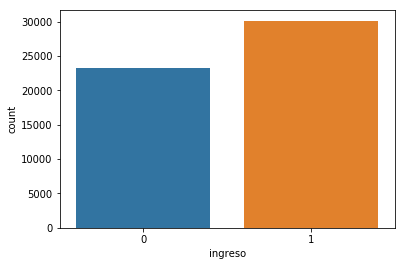

In [21]:
sns.countplot(x = 'ingreso', data = train)
plt.show()

In [23]:
train.groupby('ingreso').describe()

ingresotrim                                                        \
              count          mean            std   min      25%       50%   
ingreso                                                                     
0           23327.0  22434.725274  118893.181608  8.80  5869.56  12032.60   
1           30149.0  24140.876197  206115.492973  2.93  9489.12  16102.15   

                                  edad            ... tot_focos             \
              75%         max    count      mean  ...       75%        max   
ingreso                                           ...                        
0        23867.40  16750645.4  23327.0  0.552069  ...  0.311132  19.898964   
1        25892.43  35145097.8  30149.0 -0.432230  ...  0.311132  19.477720   

        ahorradores                                               
              count      mean       std  min  25%  50%  75%  max  
ingreso                                                           
0           23327.0  0.863806  0.343002  0.0  1.0  1.0  1.0  1.0  
1           30149.0  0.859863  0.347135  0.0  1.0  1.0  1.0  1.0  

[2 rows x 104 columns]

In [63]:
data.drop(columns = ['ingresotrim'], inplace = True)

KeyError: "['ingresotrim'] not found in axis"

In [8]:
# Obtenemos el conjunto de train y test (80/20)
train, test = train_test_split(data, test_size = 0.2, random_state = 158999)

In [9]:
data.columns

Index(['ingresotrim', 'edad', 'hor_1', 'hijos_viv', 'antiguedad', 'renta',
       'tot_resid', 'tot_hom', 'tot_muj', 'tot_hog', 'renta_approx',
       'tot_focos', 'ahorradores'],
      dtype='object')

Text(0.5, 0.98, 'Matriz de correlaciones')

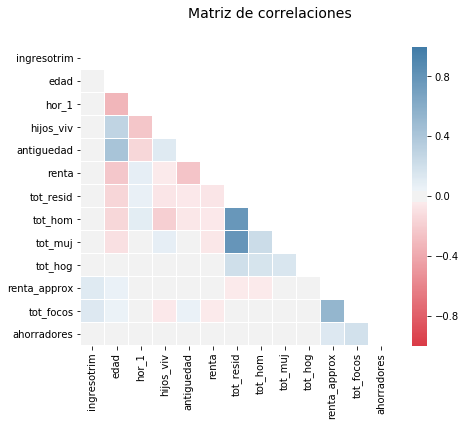

In [10]:
# Correlacion
corr = data.corr()

# plot correlation matrix
fig = plt.figure(figsize=(7, 5.5))
mask = np.zeros_like(corr, dtype=np.bool) # create mask to cover the upper triangle
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(10, 240, as_cmap=True)
sns.heatmap(corr, annot=False, mask=mask, vmin = -1.0, vmax = 1.0,linewidths=0.1, cmap = cmap)
fig.suptitle('Matriz de correlaciones', fontsize=14)
#plt.savefig('graphs/correlaciones.png', dpi = 300)

In [11]:
data.head()

,ingresotrim,edad,hor_1,hijos_viv,antiguedad,renta,tot_resid,tot_hom,tot_muj,tot_hog,renta_approx,tot_focos,ahorradores
0,54590.15,-1.011174,0.316476,-0.43056,-1.055730,1,-0.901663,-0.687705,-0.728377,-0.113551,0.454037,0.942998,1
1,47213.11,-1.261974,1.634360,-0.43056,-1.055730,1,-0.901663,-0.687705,-0.728377,-0.113551,0.594705,0.100511,1
2,82622.95,-0.133376,-1.189677,-0.43056,0.173488,0,1.211130,0.158881,1.713857,-0.113551,1.063597,2.206729,1
3,30737.69,-1.261974,0.316476,-0.43056,-1.055730,1,-0.373464,-1.534291,0.899779,-0.113551,1.063597,1.364242,1
4,42295.07,0.368224,0.203515,-0.43056,-0.625504,0,-0.901663,0.158881,-1.542455,-0.113551,1.532489,1.153620,1


In [65]:
len(X_train[:, 1])

53476

In [66]:
len(X_train[:, 0])

53476

#### PCA

In [12]:
# Analisis en componentes principales
pca = PCA(0.9)
X_train = pca.fit_transform(train.iloc[:, 1:].values)
#train_labels = train.iloc[:,0].values-1
Var_C = pca.explained_variance_ratio_
C = pca.components_

In [13]:
Var_C

array([0.23489935, 0.17008384, 0.1518959 , 0.09602436, 0.09193416,
       0.0783458 , 0.06218534, 0.04819334])

In [14]:
len(Var_C)

8

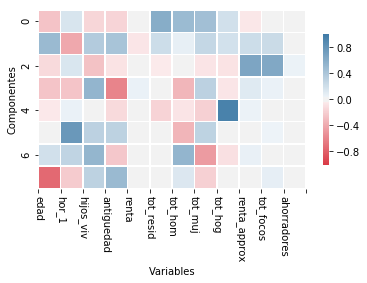

In [15]:
cmap = sns.diverging_palette(10, 240, as_cmap=True)
sns.heatmap(C, cmap=cmap, vmin=-1, vmax=1,
            linewidths=.5, cbar_kws={"shrink": .6}, yticklabels=2,
            square=True)
plt.xticks(range(0,13),list(data.columns[1:]), rotation=-90)
plt.xlabel("Variables")
plt.ylabel("Componentes")
#plt.savefig('graphs/var_en_comp.png', dpi = 300)
plt.show()

In [24]:
df_train = pd.DataFrame()
df_train["ingreso"] = train['ingreso']

for i in range(len(Var_C)):
    key = "PC" + str(i + 1)
    df_train[key] = X_train[:,i]

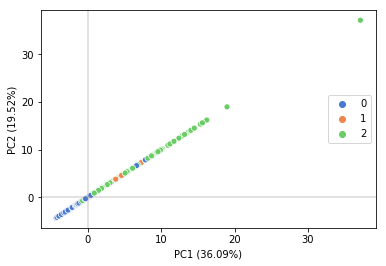

In [46]:
plt.axhline(0, color="tab:grey", alpha=0.3)
plt.axvline(0, color="tab:grey", alpha=0.3)
sns.scatterplot(X_train[:,0], X_train[:,0], hue = y_train, legend = "full", palette = sns.color_palette("muted")[:3])
plt.xlabel("PC1 (36.09%)")
plt.ylabel("PC2 (19.52%)")
#plt.savefig('graphs/scatter_train.png', dpi = 300)
plt.show()